### Boba Shop: Data Overview

Developed db using sqlite via command line (https://www.sqlitetutorial.net/)

CSVs are available for Reference:

- Customers Table: Names from https://www.babycenter.com/baby-names/most-popular/top-baby-names-1988?startIndex=400. Additional info randomly generated.
- MenuItems Table: Menu Items from https://www.milklabmobileorder.com/
- Orders Table: Orders randomly generated 

### Libraries

In [9]:
# Installations (if needed)
!pip install sqlite
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install scikit-learn
!pip install matplotlib

ERROR: Could not find a version that satisfies the requirement sqlite (from versions: none)
ERROR: No matching distribution found for sqlite
You should consider upgrading via the 'C:\Users\emily\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\emily\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\emily\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\emily\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\emily\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [34]:
# Import Libraries
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

### Establish DB Connection

In [8]:
# Define database & connection

## define database
database_file = r"boba_shop.db"

## create a database connection
connection = None
connection = sqlite3.connect(database_file)

### Define Query Method

In [109]:
# Define function to execute query on sql db
def query_execute(query_text):
    # query_text is text string of query; i.e. "SELECT * FROM Customers"
    
    # execute db query
    with connection:
        cursor = connection.cursor()
        cursor.execute(query_text)
        query_results = cursor.fetchall()
        
        # retrieve query column names
        query_columns_info = cursor.description
        query_columns = []
        for i in range(0, len(query_columns_info)):
            column_name = query_columns_info[i][0]
            query_columns.append(column_name)

    # create df with query_results and column names
    df = pd.DataFrame(query_results) 
    df.columns = query_columns
    
    # return df
    return df

### Execute Query

In [129]:
# define and execute query
query_text = "SELECT * FROM Orders"
query_results = query_execute(query_text)

# create df from query
df_orders= pd.DataFrame(query_results) 

### Query Data Visualization

In [130]:
df_orders.head()

,OrderID,CustomerID,MenuItemID,OrderDate
0,1,31,8,2021-11-05
1,2,954,61,2021-07-19
2,3,305,7,2021-04-14
3,4,247,60,2021-11-23
4,5,214,13,2021-06-06


In [131]:
df_orders['OrderDate']= pd.to_datetime(df_orders['OrderDate'])
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   OrderID     100000 non-null  int64         
 1   CustomerID  100000 non-null  int64         
 2   MenuItemID  100000 non-null  int64         
 3   OrderDate   100000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 3.1 MB


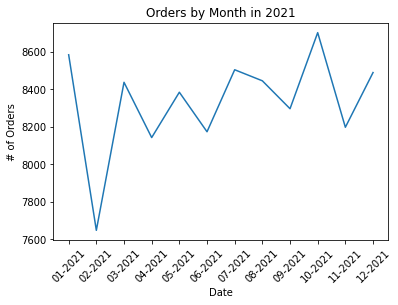

In [144]:
plt.plot(df_orders.sort_values(by=['OrderDate']).groupby(pd.to_datetime(df_orders['OrderDate']).dt.strftime('%m-%Y'), sort=False)['OrderID'].size())
plt.xlabel('Date')
plt.ylabel('# of Orders')
plt.title('Orders by Month in 2021')
plt.xticks(rotation = 45)
plt.show()

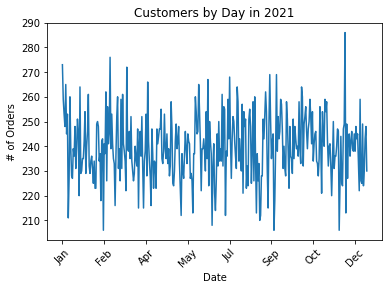

In [173]:
import matplotlib.dates as mdates
ax = df_orders.sort_values(by=['OrderDate']).groupby(pd.to_datetime(df_orders['OrderDate']).dt.strftime('%d-%m'), sort=False)['CustomerID'].nunique().plot.line()
ax.xaxis.set_major_formatter(mdates.DateFormatter(fmt='%b'))
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.ylabel('# of Orders')
plt.title('Customers by Day in 2021')
plt.show()